In [1]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import os

from sklearn.decomposition import NMF

torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
w = 320
h = 180
#w=640
#h=360

## Generate Frames from Video

In [3]:
if(True):
    count = 0
    videoFile = "./data/nature_video.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    #print(frameRate)
    #rameRate = 5
    x=1
    
    try:
        os.mkdir("./data/Images")
    except OSError:
        pass
    
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        frame = cv2.resize(frame, (w,h))
        if (frameId % math.floor(frameRate) == 0):
            filename ="./data/Images/frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

In [4]:
n = 37
X = np.zeros((n,h,w,3))

for i in range(n):
    im = plt.imread('./data/Images/frame' + str(i) + '.jpg')
    X[i,:,:,:] = im

In [5]:
X = X.reshape((n, -1,3)).transpose((0,2,1))

## Run NMF on each slice of tensor X

In [6]:
Hs = []
Ws = []
for j in range(3):
    r = 3
    model = NMF(n_components=r, init='random', random_state=2)
    W = model.fit_transform(X[:,j].T)
    H = model.components_
    W = W.reshape((180, 320, -1))

    Hs.append(H)
    Ws.append(W)

## Display spacial topics in dictionary matrix W

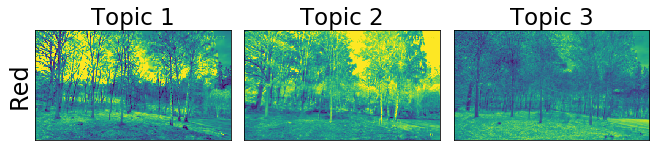

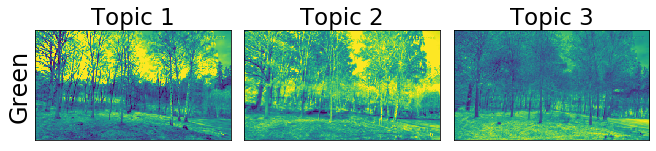

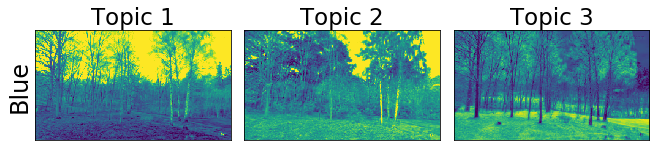

In [7]:
colors = ["Red", "Green", "Blue"]
vmin = 0
vmax = 12
r = 3
for j in range(3):
    fig, axs = plt.subplots(1, r, constrained_layout=True, figsize=(9,9))
    axs[0].set_ylabel(colors[j], fontsize=24)
    for i in range(r):
        axs[i].set_title('Topic ' + str(i+1), fontsize=23)
        axs[i].axes.xaxis.set_ticks([])
        axs[i].axes.yaxis.set_ticks([])
        axs[i].imshow(Ws[j][:,:,i], vmin=vmin, vmax=vmax)
    plt.show()

## Display temporal topics in code matrix H

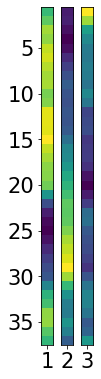

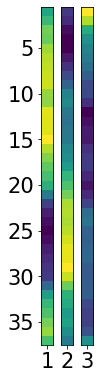

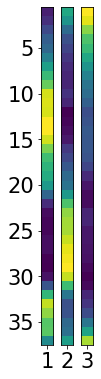

In [8]:
for j in range(3):
    fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(1.25,6.3))
    color = "viridis"
    for i in range(3):
        plt.sca(axs[i])
        plt.xticks(range(1), range(i+1,i+2), fontsize=21)
        plt.yticks(fontsize=10)
        if(i>0):
            axs[i].axes.yaxis.set_ticks([])
        else:
            plt.yticks([4,9,14,19,24,29,34], [5,10,15,20,25,30,35], fontsize=21)
        axs[i].imshow(Hs[j][[i]].T, cmap=plt.get_cmap(color))
        
            
        ratio = 28
        ax = axs[i]
        xleft, xright = ax.get_xlim()
        ybottom, ytop = ax.get_ylim()
        ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    plt.show()